In [235]:
import numpy as np
import sep
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [236]:
data = astropy.io.fits.getdata("f105.fits")
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


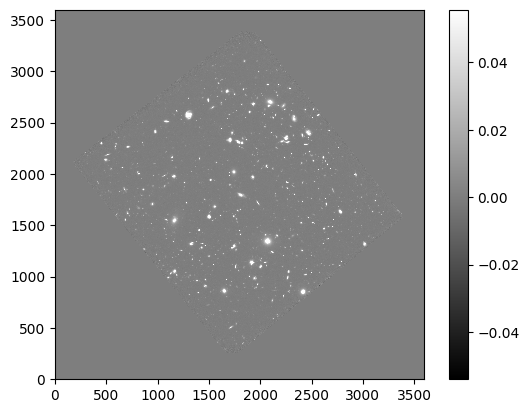

In [237]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest' , cmap='gray' , vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [238]:
data = data.byteswap(False).newbyteorder()
bkg = sep.Background(data)

In [239]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [240]:
bkg_image = bkg.back()

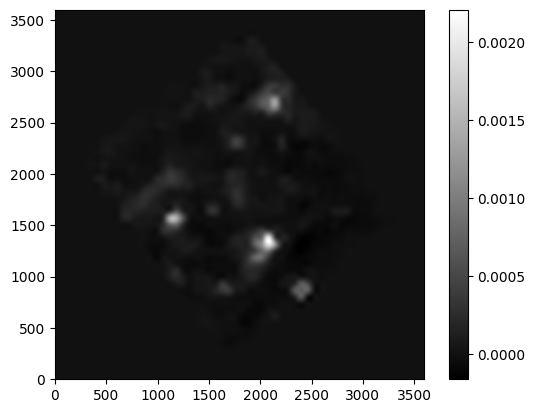

In [241]:
plt.imshow(bkg_image, interpolation='nearest' ,cmap='gray'  ,origin='lower')
plt.colorbar();

In [242]:
bkg_rms = bkg.rms()

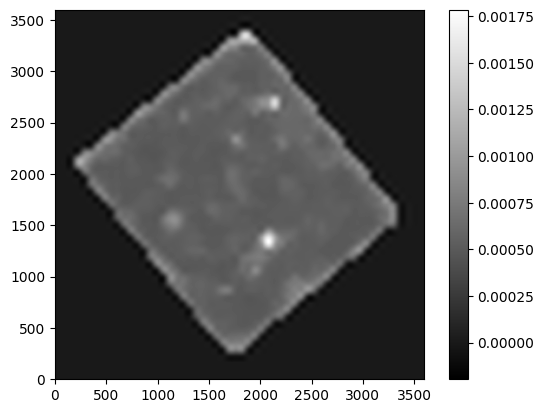

In [243]:
plt.imshow(bkg_rms, interpolation='nearest' ,cmap='gray' ,origin='lower')
plt.colorbar();

In [244]:
data_sub = data - bkg

In [245]:
objects = sep.extract(data_sub, 3, err=bkg.globalrms)
len(objects)

4349

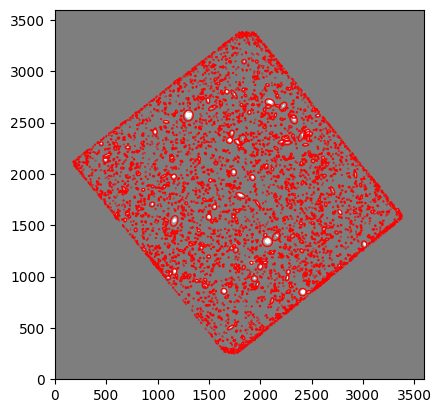

In [246]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub , interpolation='nearest' , cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects ['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [247]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [248]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

/var/folders/pt/p87f35ws41794fvfz1drc2300000gn/T/ipykernel_5243/1760513228.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(flux), bins=50)


(array([  3.,   0.,   2.,   1.,   1.,   0.,   6.,   2.,  11.,  25.,  49.,
         88., 244., 511., 649., 524., 399., 331., 284., 200., 188., 159.,
        121.,  94.,  87.,  88.,  52.,  48.,  46.,  35.,  24.,  19.,  14.,
          7.,   2.,   2.,   2.,   3.,   3.,   2.,   3.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([-3.04961884, -2.93048782, -2.81135679, -2.69222577, -2.57309474,
        -2.45396372, -2.33483269, -2.21570167, -2.09657064, -1.97743962,
        -1.85830859, -1.73917757, -1.62004654, -1.50091552, -1.38178449,
        -1.26265347, -1.14352244, -1.02439142, -0.90526039, -0.78612937,
        -0.66699835, -0.54786732, -0.4287363 , -0.30960527, -0.19047425,
        -0.07134322,  0.0477878 ,  0.16691883,  0.28604985,  0.40518088,
         0.5243119 ,  0.64344293,  0.76257395,  0.88170498,  1.000836  ,
         1.11996703,  1.23909805,  1.35822908,  1.4773601 ,  1.59649113,
         1.71562215,  1.83475317,  1.9538842 ,  2.07301522,  2.19214625,
 

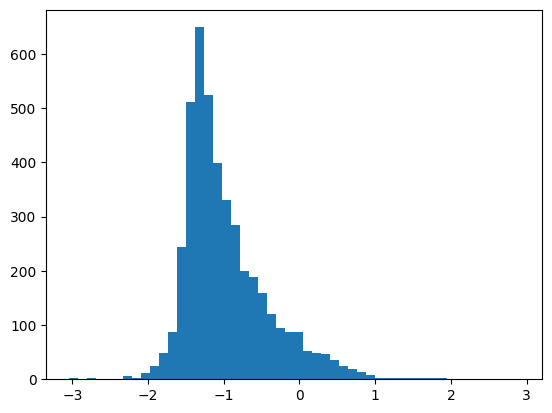

In [249]:
plt.figure()
plt.hist(np.log10(flux), bins=50)

In [250]:
for i in range (len(objects)):
    print('object {:d}: flux = {:f} +/- {:f}' .format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029831 +/- 0.172742
object 1: flux = 0.085622 +/- 0.292626
object 2: flux = 0.026933 +/- 0.164137
object 3: flux = 0.046099 +/- 0.214727
object 4: flux = 0.064379 +/- 0.253747
object 5: flux = 0.070986 +/- 0.266448
object 6: flux = 0.026083 +/- 0.161527
object 7: flux = 0.104682 +/- 0.323559
object 8: flux = 0.044953 +/- 0.212041
object 9: flux = 0.042711 +/- 0.206686
object 10: flux = 0.011400 +/- 0.106811
object 11: flux = 0.049093 +/- 0.221588
object 12: flux = 0.034875 +/- 0.186770
object 13: flux = 0.040538 +/- 0.201360
object 14: flux = 0.023936 +/- 0.154741
object 15: flux = 0.055273 +/- 0.235120
object 16: flux = 0.030075 +/- 0.173446
object 17: flux = 0.055099 +/- 0.234750
object 18: flux = 0.063030 +/- 0.251075
object 19: flux = 0.018744 +/- 0.136938
object 20: flux = 0.027169 +/- 0.164855
object 21: flux = 0.041373 +/- 0.203423
object 22: flux = 0.042518 +/- 0.206220
object 23: flux = 0.042432 +/- 0.206009
object 24: flux = 0.077463 +/- 0.278336
object 25:

In [251]:
print(np.mean(flux))
print(np.median(flux))
print(np.std(flux))
print('  ')
outlier = max(flux)
print(outlier)
print('   ')
print('The mean flux represents what the average flux is. Since a flux is basically measuring brightness, the mean is saying: "on average, the objects are ~0.7 brightness"')
print('The standard deviation represents the average distance of the data from the mean. In this context, the standard deviation is saying, "the data is ~0.07 distance away from the data"')

0.7040430645638499
0.07352971739572241
13.01835009130945
  
807.1093853378296
   
The mean flux represents what the average flux is. Since a flux is basically measuring brightness, the mean is saying: "on average, the objects are ~0.7 brightness"
The standard deviation represents the average distance of the data from the mean. In this context, the standard deviation is saying, "the data is ~0.07 distance away from the data"


### The outlier is object 983

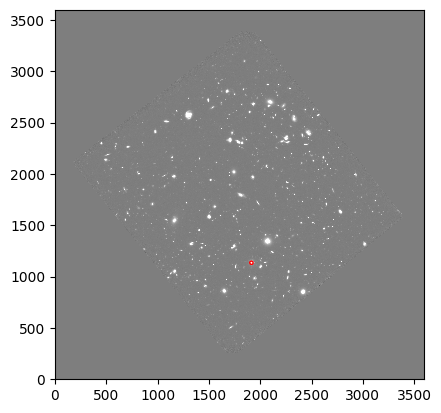

In [252]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub , interpolation='nearest' , cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
for i in [983]:
    e = Ellipse(xy=(objects['x'][i], objects ['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [253]:
data = astropy.io.fits.getdata("f105.fits")
data = data.byteswap(False).newbyteorder()
data2 = astropy.io.fits.getdata("f125.fits")
data2 = data2.byteswap(False).newbyteorder()
data3 = astropy.io.fits.getdata("f160.fits")
data3 = data3.byteswap(False).newbyteorder()

In [254]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [255]:
data_res, dmin, dmax = rescale_image(data)
data2_res, d2min, d2max = rescale_image(data2)
data3_res, d3min, d3max = rescale_image(data3)

In [256]:
data_res[data_res<dmin] = dmin
data_res[data_res>dmax] = dmax
data2_res[data2_res<dmin] = d2min
data2_res[data2_res>dmax] = d2max
data3_res[data3_res<dmin] = d3min
data3_res[data3_res>dmax] = d3max

In [257]:
data0 = (data_res-dmin)/((dmax-dmin))
data02 = (data2_res-d2min)/(d2max-d2min)
data03 = (data3_res-d3min)/(d3max-d3min)
rgb = np.zeros((data0.shape[0], data02.shape[1], 3))
rgb[:,:,0] = data0
rgb[:,:,1] = data02
rgb[:,:,2] = data03

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


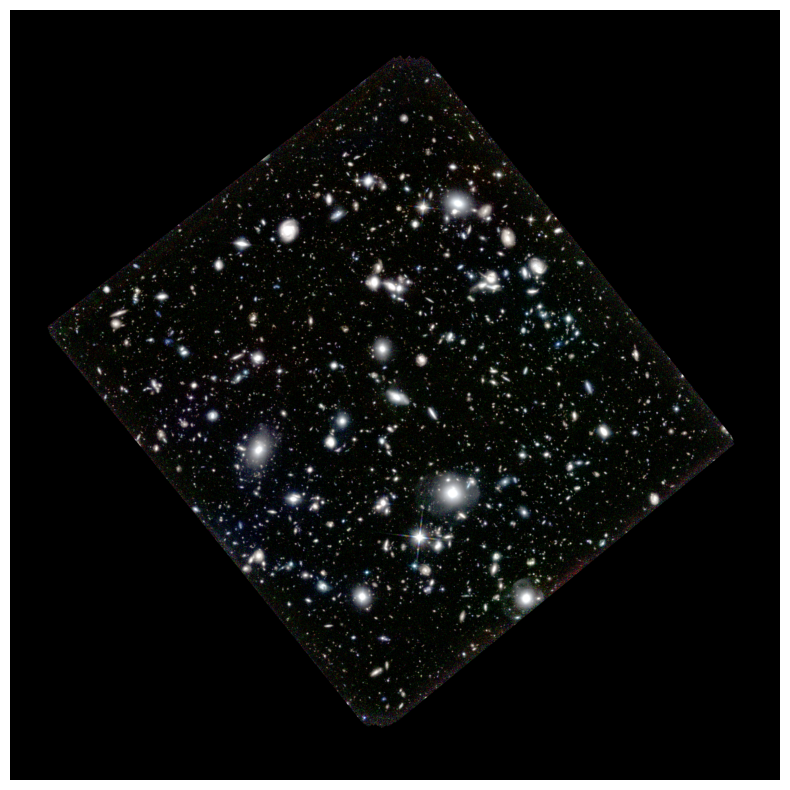

In [258]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ax.axis('off')
ax.imshow(rgb, origin='lower')
plt.savefig('Final-Project.png' ,bbox_inches='tight' ,pad_inches=0, dpi=600)